In [113]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

rainDaily = pd.read_csv('data/niwaDailyData/RainDaily.csv')
pressure = pd.read_csv('data/niwaDailyData/Pressure_9am_only.csv')
radiation = pd.read_csv('data/niwaDailyData/Radiation_Daily_Global.csv')
rainbreakpoint = pd.read_csv('data/niwaDailyData/RainBreakpointsfromRainRate.csv')
soilMoisture = pd.read_csv('data/niwaDailyData/soil.csv')
sunshine = pd.read_csv('data/niwaDailyData/SunshineDaily.csv')
surfaceWind = pd.read_csv('data/niwaDailyData/SurfaceWind9am.csv')
tempMaxMin = pd.read_csv('data/niwaDailyData/TemperatureMaxMinDaily.csv')
tempScreen = pd.read_csv('data/niwaDailyData/TemperatureScreenObs9amOnly.csv')
windMax = pd.read_csv('data/niwaDailyData/WindMaxGustDaily.csv')

In [114]:
rainDaily.head()
rainDaily['Date(NZST)'] = pd.to_datetime(rainDaily['Date(NZST)'], format='%Y%m%d:%H%M')
rainDaily.drop(columns=['Station', 'SofG', 'Period(Hrs)', 'Freq'], inplace=True)
rainDaily.rename(columns={'Amount(mm)': 'Rainfall(mm)'}, inplace=True)
rainDaily.head()


,Date(NZST),Rainfall(mm),Deficit(mm),Runoff(mm)
0,2009-01-01 08:00:00,25.0,15.5,0.0
1,2009-01-02 08:00:00,0.2,19.6,0.0
2,2009-01-03 08:00:00,38.4,0.0,14.5
3,2009-01-04 08:00:00,0.6,3.7,0.0
4,2009-01-05 08:00:00,0.0,8.1,0.0


In [115]:
rainDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date(NZST)    5352 non-null   datetime64[ns]
 1   Rainfall(mm)  5352 non-null   float64       
 2   Deficit(mm)   5352 non-null   float64       
 3   Runoff(mm)    5352 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 167.4 KB


In [116]:
print(pressure.columns)


Index(['                                          Station', 'Date(NZST)',
       'Pmsl(hPa)', 'Pstn(hPa)', 'tend', 'amt(hPa)', 'a24(hPa)'],
      dtype='object')


In [117]:
pressure.head()
pressure['Date(NZST)'] = pd.to_datetime(pressure['Date(NZST)'], format='%Y%m%d:%H%M')
pressure.drop(columns=['                                          Station','tend', 'amt(hPa)', 'a24(hPa)'], inplace=True)
pressure.head()


,Date(NZST),Pmsl(hPa),Pstn(hPa)
0,2009-01-01 08:00:00,1007.0,983.6
1,2009-01-02 08:00:00,1012.3,988.5
2,2009-01-03 08:00:00,1009.0,985.5
3,2009-01-04 08:00:00,1022.2,998.1
4,2009-01-05 08:00:00,1022.5,998.6


In [118]:
radiation.head()
radiation['Date(NZST)'] = pd.to_datetime(radiation['Date(NZST)'], format='%Y%m%d:%H%M')
radiation.drop(columns=['Station', 'Period(Hrs)', 'Type', 'Freq'], inplace=True)
radiation.head()

,Date(NZST),Amount(MJ/m2)
0,2009-07-19 23:59:00,3.85
1,2009-07-20 23:59:00,4.64
2,2009-07-21 23:59:00,1.87
3,2009-07-22 23:59:00,3.23
4,2009-07-23 23:59:00,0.77


In [119]:
rainbreakpoint.head()
rainbreakpoint['Date(NZST)_Incl_secs'] = pd.to_datetime(rainbreakpoint['Date(NZST)_Incl_secs'], format='%Y%m%d:%H%M%S%f')
rainbreakpoint.rename(columns={"Date(NZST)_Incl_secs": "Date(NZST)", 'Amount(mm)' : 'Rain(mm)', 'Period(min)': 'Rain Duration(min)'}, inplace=True)
rainbreakpoint.drop(columns=['Station', 'Freq'], inplace=True)
rainbreakpoint.head()

,Date(NZST),Rain(mm),Rain Duration(min)
0,2009-01-01 00:08:03.000,0,8.5
1,2009-01-01 00:23:03.000,0.16,15.0
2,2009-01-01 01:11:01.200,0,47.7
3,2009-01-01 01:22:03.600,0.12,11.4
4,2009-01-01 02:04:03.600,0,42.0


In [120]:
soilMoisture.head()
soilMoisture['Date(NZST)'] = pd.to_datetime(radiation['Date(NZST)'], format='%Y%m%d %H%M%S%f')
soilMoisture.rename(columns={"Percent(%)": "SoilMoisture(%)"}, inplace=True)
soilMoisture.drop(columns=['Station', 'Depth(cm)'], inplace=True)
soilMoisture.head()


,Date(NZST),SoilMoisture(%)
0,2009-07-19 23:59:00,53.3
1,2009-07-20 23:59:00,52.9
2,2009-07-21 23:59:00,52.9
3,2009-07-22 23:59:00,52.8
4,2009-07-23 23:59:00,52.7


In [121]:
sunshine.columns

Index(['Station', 'Date(NZST)', 'Amount(Hrs)', 'Period(Hrs)', 'Freq'], dtype='object')

In [122]:
sunshine.head()
sunshine['Date(NZST)'] = pd.to_datetime(sunshine['Date(NZST)'], format='%Y%m%d:%H%M')
sunshine.rename(columns={"Amount(Hrs)": "Sunshine Amount(Hrs)"}, inplace=True)
sunshine.drop(columns=['Station', 'Period(Hrs)', 'Freq' ], inplace=True)
sunshine.head()

,Date(NZST),Sunshine Amount(Hrs)
0,2009-01-01 22:59:00,9.4
1,2009-01-02 22:59:00,4.4
2,2009-01-03 22:59:00,6.3
3,2009-01-04 22:59:00,7.5
4,2009-01-05 22:59:00,9.9


In [123]:
surfaceWind.head()
surfaceWind['Date(NZST)'] = pd.to_datetime(surfaceWind['Date(NZST)'], format='%Y%m%d:%H%M')
surfaceWind.rename(columns={"Dir(DegT)": "Wind Directionr(DegT)", "Speed(m/s)": "Wind Speed(m/s)", "Dir StdDev": "Wind Dir StdDev", "Spd StdDev": "Wind Spd StdDev"}, inplace=True)
surfaceWind.drop(columns=['Station', 'Period(Hrs)', 'Freq' ], inplace=True)
surfaceWind.head()

,Date(NZST),Wind Directionr(DegT),Wind Speed(m/s),Wind Dir StdDev,Wind Spd StdDev
0,2009-01-01 08:00:00,242,1.0,74,0.8
1,2009-01-02 08:00:00,28,0.7,79,0.6
2,2009-01-03 08:00:00,214,0.6,22,0.5
3,2009-01-04 08:00:00,304,0.8,34,0.4
4,2009-01-05 08:00:00,101,1.7,23,0.5


In [124]:
tempMaxMin.head()
tempMaxMin['Date(NZST)'] = pd.to_datetime(tempMaxMin['Date(NZST)'], format='%Y%m%d:%H%M')
tempMaxMin.drop(columns=['Station', 'Period(Hrs)', 'Period(Hrs).1','Period(Hrs).2', 'RHmean(%)', 'Period(Hrs).3', 'Freq' ], inplace=True)
tempMaxMin.head()

,Date(NZST),Tmax(C),Tmin(C),Tgmin(C),Tmean(C)
0,2019-01-01 08:00:00,25.6,14.3,12.5,20
1,2019-01-02 08:00:00,26.9,16.6,15.8,21.8
2,2019-01-03 08:00:00,24.8,16,13.2,20.4
3,2019-01-04 08:00:00,23.1,13.3,10.2,18.2
4,2019-01-05 08:00:00,22.1,8.4,5.4,15.3


In [125]:
# tempScreen.head()
# # Filter out rows with invalid 'Date(NZST)' values
# tempScreen = tempScreen[tempScreen['Date(NZST)'].str.match(r'\d{8}:\d{4}')]

# # Convert 'Date(NZST)' to datetime
# tempScreen['Date(NZST)'] = pd.to_datetime(tempScreen['Date(NZST)'], format='%Y%m%d:%H%M')
# # # tempScreen.drop(columns=['Station', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], inplace=True)

# tempScreen.head()


In [126]:
windMax.head()
windMax['Date(NZST)'] = pd.to_datetime(windMax['Date(NZST)'], format='%Y%m%d:%H%M')
windMax.drop(columns=['Station', 'Period(Hrs)', 'Freq' ], inplace=True)
windMax.head()


,Date(NZST),Dir(DegT),Speed(m/s)
0,2009-01-01 22:59:00,275,9.3
1,2009-01-02 22:59:00,44,11.8
2,2009-01-03 22:59:00,13,11.8
3,2009-01-04 22:59:00,190,7.7
4,2009-01-05 22:59:00,185,7.2


In [127]:
# Merge dataframes based on 'Date(NZST)' column
weatherdf = rainDaily.merge(pressure, on='Date(NZST)', how='outer')
weatherdf = weatherdf.merge(radiation, on='Date(NZST)', how='outer')
weatherdf = weatherdf.merge(rainbreakpoint, on='Date(NZST)', how='outer')
weatherdf = weatherdf.merge(soilMoisture, on='Date(NZST)', how='outer')
weatherdf = weatherdf.merge(sunshine, on='Date(NZST)', how='outer')
weatherdf = weatherdf.merge(tempMaxMin, on='Date(NZST)', how='outer')
weatherdf = weatherdf.merge(surfaceWind, on='Date(NZST)', how='outer')
# weatherdf = weatherdf.merge(tempScreen, on='Date(NZST)', how='outer')
# weatherdf = weatherdf.merge(windMax, on='Date(NZST)', how='outer')


In [128]:
weatherdf

,Date(NZST),Rainfall(mm),Deficit(mm),Runoff(mm),Pmsl(hPa),Pstn(hPa),Amount(MJ/m2),Rain(mm),Rain Duration(min),SoilMoisture(%),Sunshine Amount(Hrs),Tmax(C),Tmin(C),Tgmin(C),Tmean(C),Wind Directionr(DegT),Wind Speed(m/s),Wind Dir StdDev,Wind Spd StdDev
0,2009-01-01 08:00:00,25.0,15.5,0.0,1007.0,983.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,1.0,74.0,0.8
1,2009-01-02 08:00:00,0.2,19.6,0.0,1012.3,988.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.7,79.0,0.6
2,2009-01-03 08:00:00,38.4,0.0,14.5,1009.0,985.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.0,0.6,22.0,0.5
3,2009-01-04 08:00:00,0.6,3.7,0.0,1022.2,998.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.0,0.8,34.0,0.4
4,2009-01-05 08:00:00,0.0,8.1,0.0,1022.5,998.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,1.7,23.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129752,2009-09-23 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129753,2010-11-23 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129754,2012-04-04 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129755,2012-06-21 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
mean = weatherdf['Rainfall(mm)'].mean()
weatherdf['Rainfall(mm)'].fillna(mean, inplace=True)
weatherdf.drop(columns=['Rain(mm)', 'Rain Duration(min)', 'Soil Measure Depth(cm)'], inplace=True)
weatherdf

KeyError: "['Soil Measure Depth(cm)'] not found in axis"

<Axes: >

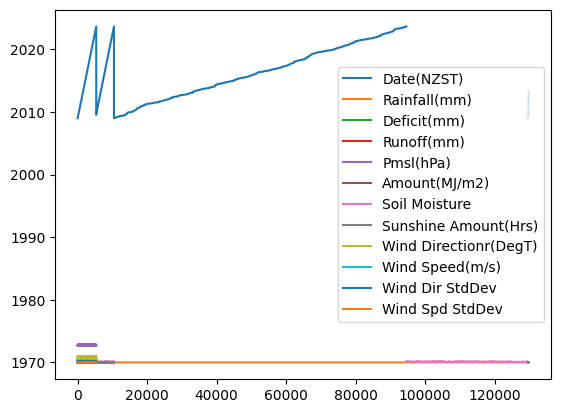

In [ ]:
weatherdf.plot()